In [1]:
from citroen.models.exponential import ExponentialModel
import pandas as pd
from pathlib import Path
import numpy as np
from typing import Tuple, List
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
data_folder = Path().resolve().parent / "data"

In [3]:
train = pd.read_parquet(path=data_folder / "train.parquet")
test = pd.read_parquet(path=data_folder / "test.parquet")

In [4]:
class ColumnDropperTransformer(TransformerMixin):
    def __init__(self, columns: List[str]):
        self.columns = columns

    def transform(self, X: pd.DataFrame, y=None):
        return X.drop(columns=self.columns)

    def fit(self, X: pd.DataFrame, y=None):
        return self

In [5]:
def get_variables(df: pd.DataFrame, target: str) -> Tuple[pd.DataFrame, pd.Series]:
    X = df.drop(columns=target)
    y = df[target]
    return X, y

In [6]:
rnd = np.random.RandomState(42)


In [7]:
X_train, y_train = get_variables(df=train, target="coste")
X_test, y_test = get_variables(df=test, target="coste")

In [8]:
model = ExponentialModel(initial_params=rnd.uniform(-1, 1, size=4))
dropper = ColumnDropperTransformer(columns=["consumo_medio"])


In [9]:
pipe = Pipeline(steps=[("dropper", dropper), ("model", model)])

In [10]:
pipe.fit(X_train, y_train)

/home/dadiego/projects/car-consumption-prediction/src/citroen/models/exponential.py:18: RuntimeWarning: overflow encountered in exp
  consumption = w0 + w1 * np.exp(-w2 * distance + w3)


Pipeline(steps=[('dropper',
                 <__main__.ColumnDropperTransformer object at 0x7fefba68e770>),
                ('model',
                 ExponentialModel(initial_params=array([-0.25091976,  0.90142861,  0.46398788,  0.19731697])))])

In [11]:
pipe.score(X_test, y_test)


0.9922720532680126

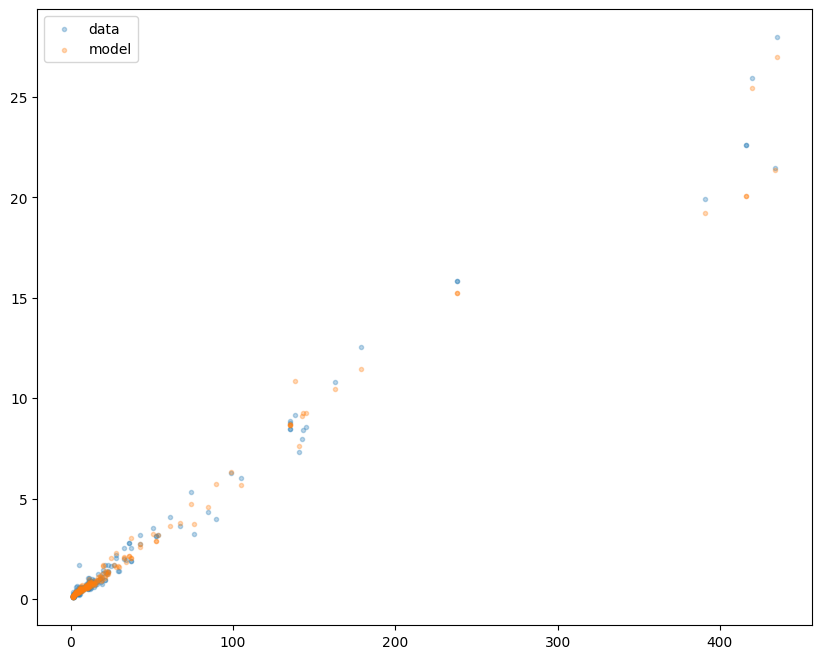

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(x=X_test.distancia, y=y_test, marker=".", label="data", alpha=0.3)
plt.scatter(
    x=X_test.distancia, y=pipe.predict(X_test), marker=".", label="model", alpha=0.3
)
plt.legend()
plt.show()
